In [168]:
from CryptoData import CryptoData
prices = CryptoData.get_historical_price('BTCUSDT', '1d')
print(prices)

          time            open            high             low  \
0   2021-08-31  46982.91000000  48246.11000000  46700.00000000   
1   2021-09-01  47100.89000000  49156.00000000  46512.00000000   
2   2021-09-02  48810.51000000  50450.13000000  48584.06000000   
3   2021-09-03  49246.63000000  51000.00000000  48316.84000000   
4   2021-09-04  49998.00000000  50535.69000000  49370.00000000   
..         ...             ...             ...             ...   
995 2024-05-22  70148.34000000  70666.00000000  68842.19000000   
996 2024-05-23  69166.62000000  70096.12000000  66312.16000000   
997 2024-05-24  67969.66000000  69250.00000000  66600.12000000   
998 2024-05-25  68549.99000000  69610.00000000  68500.00000000   
999 2024-05-26  69290.56000000  69319.31000000  69151.50000000   

              close          volume     close_time   quote_asset_volume  \
0    47100.89000000  48645.52737000  1630454399999  2303799571.38227270   
1    48810.52000000  49904.65528000  1630540799999  23860

In [169]:
prices.keys()

Index(['time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignore'],
      dtype='object')

In [170]:
prices['close']

0      47100.89000000
1      48810.52000000
2      49246.64000000
3      49999.14000000
4      49915.64000000
            ...      
995    69166.62000000
996    67969.65000000
997    68549.99000000
998    69290.57000000
999    69159.00000000
Name: close, Length: 1000, dtype: object

In [171]:
import pandas as pd

df1 = prices.copy()
df1['time'] = pd.to_datetime(df1['time'])
train_data = df1.query('time >= "2022-08-01"')
test_data = df1.query('time < "2022-08-01"')

In [172]:
# df de valores maximos y minimos por registro
df_2 = train_data[['close']]
df_3 = test_data[['close']]
df_2.head(10)

,close
335,23268.01000000
336,22987.79000000
337,22818.37000000
338,22622.98000000
339,23312.42000000
340,22954.21000000
341,23174.39000000
342,23810.00000000
343,23149.95000000
344,23954.05000000


In [173]:
# normalizar valores en rango de 0 a 1
from sklearn.preprocessing import MinMaxScaler
import numpy as np
sc = MinMaxScaler(feature_range=(0, 1))

train_scaled = sc.fit_transform(df_2)


In [174]:
# tomare bloques de 30 datos consecutivos para almacenar en x
time_step = 30
x_train = []
y_train = []
m = len(train_scaled)

for i in range(time_step, m):
    x_train.append(train_scaled[i-time_step:i,0])
    y_train.append(train_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [175]:
# reajustar los datos de entrenamiento para que sean 30*1
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [176]:
# creamos la red
from keras.models import Sequential
from keras.layers import Dense, LSTM

dim_entrada = (x_train.shape[1], 1)
dim_salida = 1
na = 2 # numero de neuronas en la red

modelo = Sequential()
modelo.add(LSTM(units = na, input_shape=dim_entrada))
modelo.add(Dense(units = dim_salida)) # funcion dense con dato de salida = 1
modelo.compile(loss='mean_squared_error', optimizer='rmsprop') #rmsdprop funciona como gradient descent
modelo.fit(x_train, y_train, epochs=100, batch_size=32) # 100 ejemplos y 32 repes

Epoch 1/100


d:\Descargas\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2415
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2171
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1601
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1566
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1246
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1323
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1075
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0962
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0974
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0798
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0811
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0798
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0736
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0747
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0683
Epoch 16/100
20/

In [177]:
# normalizar set de validacion
x_test = df_3.values
x_test = sc.transform(x_test)

X_test = []
for i in range(time_step, len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

d:\Descargas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



In [178]:
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)
prediccion

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[44786.293],
       [45235.367],
       [46616.86 ],
       [46935.195],
       [47519.438],
       [48269.36 ],
       [49476.305],
       [51368.953],
       [51917.168],
       [52726.668],
       [53706.92 ],
       [54300.82 ],
       [55728.66 ],
       [56043.59 ],
       [56990.69 ],
       [57566.062],
       [59334.41 ],
       [59910.87 ],
       [60736.473],
       [61466.805],
       [62631.477],
       [63708.523],
       [63345.36 ],
       [63236.836],
       [63537.13 ],
       [63571.223],
       [64264.19 ],
       [63754.637],
       [63253.355],
       [63722.45 ],
       [64199.74 ],
       [64229.746],
       [64172.754],
       [64109.62 ],
       [64726.406],
       [64786.72 ],
       [64501.055],
       [64378.066],
       [64485.51 ],
       [64959.69 ],
       [66144.99 ],
       [66337.625],
       [66083.51 ],
       [66160.22 ],
       [66071.484],
       [66163.49 ],
       [66480.28 ],
       [66091.766],
       [65153.742],
       [65002.008],


In [179]:
# graficar valores reales y predicciones

# recuperar valores reales
real = df_3[time_step:].values
df_result = pd.DataFrame({
    'Fecha': test_data['time'].values[time_step:],
    'ValorReal': real.flatten(),
    'Prediccion': prediccion.flatten()
})

In [180]:
astype = df_result['ValorReal'].astype('float32')
df_result['ValorReal'] = astype

df_result.dtypes

Fecha         datetime64[ns]
ValorReal            float32
Prediccion           float32
dtype: object

In [181]:
import plotly.express as px

fig = px.line(df_result, x="Fecha", y=['ValorReal', 'Prediccion'], template="plotly_dark")
fig.show()

d:\Descargas\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



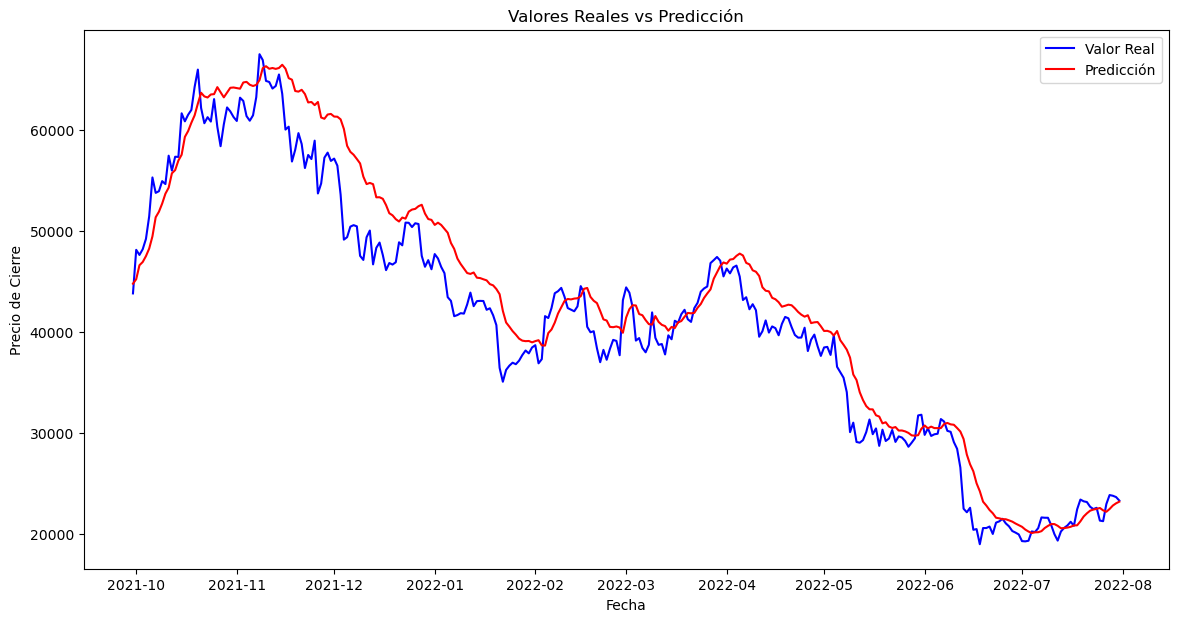

In [182]:
import matplotlib.pyplot as plt
# Configurar el tamaño de la figura
plt.figure(figsize=(14, 7))

# Graficar los valores reales
plt.plot(df_result['Fecha'], df_result['ValorReal'], label='Valor Real', color='blue')

# Graficar los valores predichos
plt.plot(df_result['Fecha'], df_result['Prediccion'], label='Predicción', color='red')

# Añadir título y etiquetas
plt.title('Valores Reales vs Predicción')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()